In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

In [2]:
def arrangements(n: int, k: int) -> int:
    """Число размещений.
    """
    
    return np.math.factorial(n) // np.math.factorial(n - k)


def permutations(n: int) -> int:
    """Число перестановок.
    """
    
    return np.math.factorial(n)

def combinations(n: int, k: int) -> int:
    """Число сочетаний.
    """
    
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

# Урок 2

## Дискретные случайные величины. Закон распределения вероятностей. Биномиальный закон распределения. Распределение Пуассона

### Задача 1

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите $M(X)$, $D(X)$.

Решение:

Число правильных ответов может принимать значения $0, 1, 2, 3, 4, 5$

В то же время из условия задачи становится ясно, что случайная величина имеет биномиальный закон распределения: мы 5 раз повторяем выбор ответа, и в каждом случае имеем вероятность $p = 0.25$ выбрать правильный

Тогда вероятности определяются формулой Бернулли:

$$
P_{n}^{k}=C_{n}^{k} p^{k} q^{n-k}
$$

А закон распределения имеет вид:

|  0   |  1   |  2   |  3   |  4   |  5   |
|------|------|------|------|------|------|
|0.237 |0.396 |0.264 |0.088 |0.015 |0.001 |

Математические ожидание:

$$
M(X) = np = 5 \cdot 0.25 = 1.25
$$

Дисперсия:

$$
D(X) = np(1-p) = 5 \cdot 0.25 \cdot 0.75 = 0.3125
$$

In [5]:
def bernulli(n: int, k: int, p):
    return combinations(n, k) * p ** k * (1 - p) ** (n - k)

In [8]:
x0 = bernulli(5, 0, 0.25)
x1 = bernulli(5, 1, 0.25)
x2 = bernulli(5, 2, 0.25)
x3 = bernulli(5, 3, 0.25)
x4 = bernulli(5, 4, 0.25)
x5 = bernulli(5, 5, 0.25)

print(x0)
print(x1)
print(x2)
print(x3)
print(x4)
print(x5)

print(x0 + x1 + x2 + x3 + x4 + x5)

0.2373046875
0.3955078125
0.263671875
0.087890625
0.0146484375
0.0009765625
1.0


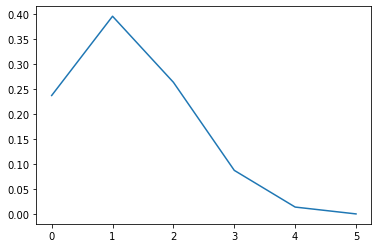

In [12]:
x_values = np.arange(0, 6)
x_prob = np.array([x0, x1, x2, x3, x4, x5])

plt.plot(x_values, x_prob)

### Задача 2

Вероятность попадания в цель при одном выстреле равна 0.01. Какова вероятность того, что число попаданий при 200 выстрелах будет не менее 5 и не более 10?

Решение:

Если допустить, что, формально, число выстрелов может быть и больше $200$, становится ясно, что для решения этой задачи стоит использовать распределение Пуассона, которое как раз применимо для больших значений $n$ (провел аналогию с задачей о письмах из вебинара).

Рассчитаем отдельно вероятности ровно $5, 6, 7, 8, 9$ и $10$ попаданий, с помощью приближенной формулы:

$$
P(X=k)=\frac{a^{k} e^{-a}}{k !}, a = np
$$

Так как количество пападаний это несовместное событие (например, мы не можем одновременно из 200 выстрелов попасть и 5 и 6 раз), общую вероятность найдем простым суммированием найденных вероятностей

In [51]:
def poisson_prob(n, p, k):
    prob = ((n * p) ** k * np.exp(-(n * p))) / np.math.factorial(k)
    return prob

In [52]:
x_values = np.arange(5, 11)
x_prob = np.array([])

for item in x_values:
    prob = poisson_prob(200, 0.01, item)
    x_prob = np.append(x_prob, prob)
    
print(x_prob)

[3.60894089e-02 1.20298030e-02 3.43708656e-03 8.59271640e-04
 1.90949253e-04 3.81898506e-05]


In [53]:
print(np.sum(x_prob))

0.052644709119342686


### Задача 3

В условиях предыдущей задачи сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 10 раз будет совершено попадание?

Подсказка. Как посчитать $P(X >= k)$ для величины X, имеющей распределение Пуассона? Здесь предстоит немножко покодить.

Решение:

Напишем программу, которая будет вычислять сумму вероятностей попасть в мишень 9 и менее раз. Программе необходимо изменять число испытаний $n$ до тех пор пока единица минус сумма полученных вероятностей не будет больше либо равна 0.9 

In [56]:
def poisson_not_less_than_k(p_target, p_single, k):
    n = k - 1
    p_test = 0
    while p_test < p_target:
        n += 1
        x_values = np.arange(0, 10)
        p_sum = 0
        for item in x_values:
            p_sum += poisson_prob(n, p_single, item)
        
        p_test = 1 - p_sum
        
    print(f'Необходимо сделать не менее {n} выстрелов. Вероятность составит {p_test}')
          
poisson_not_less_than_k(0.9, 0.01, 10)

Необходимо сделать не менее 1421 выстрелов. Вероятность составит 0.9001760722984115
